<a href="https://colab.research.google.com/github/Shiladitya56/Algorithm-Analysis/blob/main/SEM2/sorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Get Set Sort!!!


In [41]:
import random
from typing import List
import time
import matplotlib.pyplot as pt

In [42]:
class Sort(object):
  arr = []
  def __init__(shila, arr:List):
    shila.arr = arr
  def sort():
    raise NotImplementedError()

In [43]:
class Bubble(Sort):
  et = 0
  def __init__(shila, arr:List):
    super().__init__(arr)
  def sort(shila)->None:
    st = time.time()
    for i in range(len(shila.arr)):
      swapped = False
      for j in range(0, len(shila.arr) - i - 1):
        if shila.arr[j] > shila.arr[j + 1]:
          temp = shila.arr[j]
          shila.arr[j] = shila.arr[j+1]
          shila.arr[j+1] = temp
          swapped = True
      if not swapped:
        break
    shila.et = time.time() - st
class Merge(Sort):
  et = 0
  def __init__(shila, arr:List):
    super().__init__(arr)
  def sort(shila):
    st = time.time()
    w = 1
    n = len(shila.arr)
    while w < n:
      l = 0
      while l < n:
        r = min(l+(w*2-1), n-1)
        m = min(l+w-1,n-1)
        shila.merge(l, m, r)
        l += w* 2
      w *= 2
    shila.et = time.time() - st
  def merge(shila, l, m, r):
    n1 = m - l + 1
    n2 = r - m
    L = [0] * n1
    R = [0] * n2
    for i in range(0, n1):
      L[i] = shila.arr[l + i]
    for i in range(0, n2):
      R[i] = shila.arr[m + i + 1]
    i, j, k = 0, 0, l
    while i < n1 and j < n2:
      if L[i] <= R[j]:
        shila.arr[k] = L[i]
        i += 1
      else:
        shila.arr[k] = R[j]
        j += 1
      k += 1
    while i < n1:
      shila.arr[k] = L[i]
      i += 1
      k += 1
    while j < n2:
      shila.arr[k] = R[j]
      j += 1
      k += 1
class Insertion(Sort):
  et = 0
  def __init__(shila, arr:List):
    super().__init__(arr)
  def sort(shila):
    st = time.time()
    for i in range(1, len(shila.arr)):
      k = shila.arr[i]
      j = i - 1
      while j >= 0 and k < shila.arr[j]:
        shila.arr[j + 1] = shila.arr[j]
        j = j - 1
      shila.arr[j + 1] = k
    shila.et = time.time()-st
class Selection(Sort):
  et = 0
  def __init__(shila, arr:List):
    super().__init__(arr)
  def sort(shila):
    st = time.time()
    for i in range(len(shila.arr)):
      min = i
      for j in range(i+1, len(shila.arr)):
        if shila.arr[j] < shila.arr[min]:
          min = j
      (shila.arr[i], shila.arr[min]) = (shila.arr[min], shila.arr[i])
    shila.et = time.time()-st

In [44]:
class Complex(object):
  bubble = []
  merge = []
  insertion = []
  selection = []
  def __init__(shila):
    pass
  def timcom(shila):
    '''
      This function returns in order -
      merge.. bubble.. insertion.. selection.
    '''
    for i in range(10,2000,100):
      shila.r1 = []
      for j in range(i):
        shila.r1.append(random.randint(1,999999999))
      shila.r2 = shila.r1[:]
      shila.merge.append(shila.mertim())
      shila.bubble.append(shila.bubtim())
      shila.insertion.append(shila.intim())
      shila.selection.append(shila.setim())
    return shila.merge, shila.bubble, shila.insertion, shila.selection
  def mertim(shila):
    o = Merge(shila.r1)
    o.sort()
    shila.r1 = shila.r2
    return o.et
  def bubtim(shila):
    o = Bubble(shila.r1)
    o.sort()
    shila.r1 = shila.r2
    return o.et
  def intim(shila):
    o = Insertion(shila.r1)
    o.sort()
    shila.r1 = shila.r2
    return o.et
  def setim(shila):
    o = Selection(shila.r1)
    o.sort()
    shila.r1 = shila.r2
    return o.et

In [45]:
tim = Complex()
merge, bubble, insertion, selection = tim.timcom()

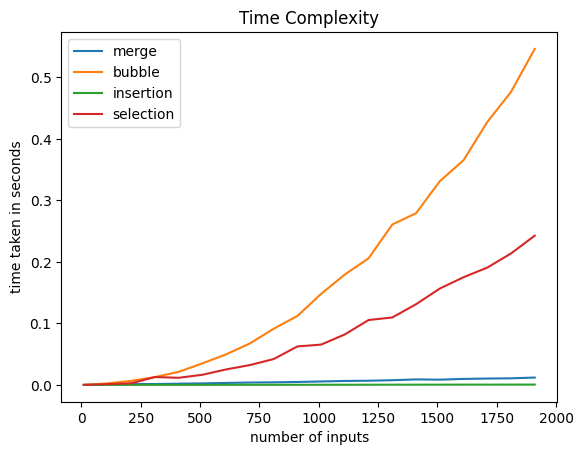

In [46]:
pt.plot(range(10,2000,100), merge)
pt.plot(range(10,2000,100), bubble)
pt.plot(range(10,2000,100), insertion)
pt.plot(range(10,2000,100), selection)
pt.legend(['merge', 'bubble', 'insertion','selection'])
pt.xlabel('number of inputs')
pt.ylabel('time taken in seconds')
pt.title('Time Complexity');